In [4]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df=pd.read_csv("bank_transactions.csv")

Saving bank_transactions.csv to bank_transactions (1).csv


In [6]:
df.drop(columns=['TransactionID'],inplace=True)

In [10]:
df['TransactionDate']=pd.to_datetime(df['TransactionDate'],format ='%d-%m-%Y')
df['TransactionTime']=df['TransactionTime'].astype(str).str.zfill(6)
df['TransactionTime']=pd.to_datetime(df['TransactionTime'],format ='%H%M%S').dt.time

In [12]:
df.dropna(subset=['CustGender','CustLocation','CustAccountBalance','CustomerDOB'],inplace=True)

In [13]:
df.drop_duplicates(inplace=True)

In [15]:
#1
df.groupby('CustGender')['TransactionAmount (INR)'].mean()

,TransactionAmount (INR)
CustGender,
F,1629.701993
M,1742.324514


In [17]:
#2
transaction_per_city = df['CustLocation'].value_counts()
highest=transaction_per_city.idxmax()
transaction_per_city,highest

(CustLocation
 MUMBAI                             1980
 NEW DELHI                          1607
 BANGALORE                          1572
 DELHI                              1362
 GURGAON                            1355
                                    ... 
 MAHISAGAR                             1
 ASHRAM ROAD AHMEDABAD                 1
 NEAR TO UNIVERSAL GYM BANGALORE       1
 NEW BOMBAY                            1
 MODEL SCHOOL HYDERABAD                1
 Name: count, Length: 1774, dtype: int64,
 'MUMBAI')

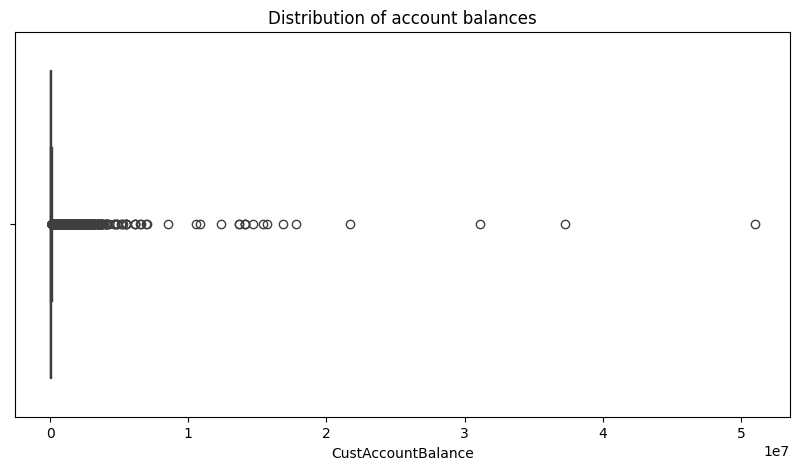

In [19]:
#3
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.boxplot(x=df['CustAccountBalance'])
plt.title("Distribution of account balances")
plt.show()

<Axes: title={'center': 'Transactions per month'}, xlabel='TransactionMonth'>

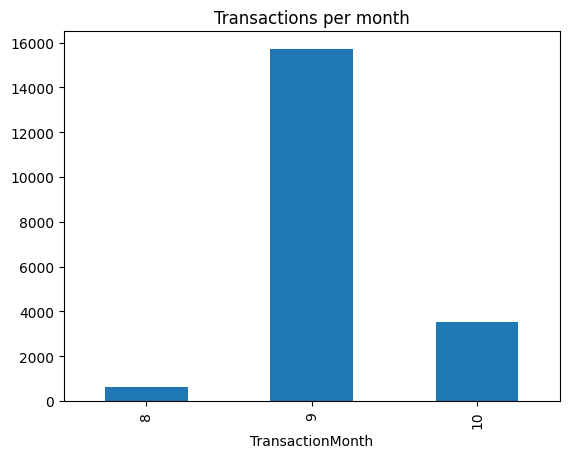

In [22]:
#4
df['TransactionMonth']=df['TransactionDate'].dt.month
transactions_per_month = df['TransactionMonth'].value_counts().sort_index()
transactions_per_month.plot(kind='bar',title="Transactions per month")

In [24]:
#5
top=df.groupby('CustomerID')['TransactionAmount (INR)'].sum().nlargest(5)
top

,TransactionAmount (INR)
CustomerID,
C7367184,455122.00
C9067184,300000.00
C7675278,137890.00
C1225314,134110.00
C7934012,129500.12


<Axes: title={'center': 'Peak transaction hour'}, xlabel='TransactionHour'>

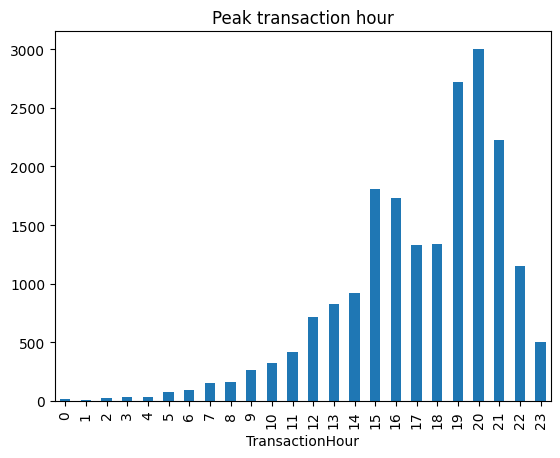

In [25]:
#6
df['TransactionHour']=pd.to_datetime(df['TransactionTime'],format='%H:%M:%S').dt.hour
df['TransactionHour'].value_counts().sort_index().plot(kind='bar',title='Peak transaction hour')

In [27]:
#7
df['BalanceSegment']=pd.cut(df['CustAccountBalance'],bins=[0,5000,50000,500000,float('inf')],labels=['low','medium','high','very high'])
df.groupby('BalanceSegment')['TransactionAmount (INR)'].mean()

<ipython-input-27-33bdd284347f>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('BalanceSegment')['TransactionAmount (INR)'].mean()


,TransactionAmount (INR)
BalanceSegment,
low,989.427719
medium,1305.735878
high,2550.748429
very high,5159.951481


In [29]:
#8
df['CustomerDOB']=pd.to_datetime(df['CustomerDOB'],format='%d-%m-%Y',errors='coerce')
df['CustomerAge']=df['CustomerDOB'].apply(lambda x: 2025- x.year if pd.notnull(x)else None)
df['AgeGroup']=pd.cut(df['CustomerAge'],bins=[0,25,40,60,100],labels=['<25','25-40','40-60','60+'])
df.groupby('AgeGroup')['TransactionAmount (INR)'].mean()

<ipython-input-29-08d7ebebd8d6>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('AgeGroup')['TransactionAmount (INR)'].mean()


,TransactionAmount (INR)
AgeGroup,
<25,2089.613846
25-40,1106.619153
40-60,2118.218436
60+,3826.884656
